In [31]:
from PIL import Image
import math

def fish_eye_dis(img):
    img = Image. fromarray(img)
    "fish eye distortion"
    width_in, height_in = img.size
    im_out = Image.new("L",(width_in,height_in))
    radius = max(width_in, height_in)/2
    #assume the fov is 180
    #R = f*theta
    lens = radius*2/math.pi
    for i in range(width_in):
        for j in range(height_in):
            #offset to center
            x = i - width_in/2
            y = j - height_in/2
            r = math.sqrt(x*x + y*y)
            theta = math.atan(r/radius)
            if theta<0.00001:
                k = 1
            else:
                k = lens*theta/r

            src_x = x*k
            src_y = y*k
            src_x = src_x+width_in/2
            src_y = src_y+height_in/2
            pixel = img.getpixel((src_x,src_y))
            im_out.putpixel((i,j),pixel)

    return im_out


In [40]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

image_file = r'C:\USB backup\Sem1, 2019\ENGN8602\sample_data\to_b20061127ut005945s19380.fits.gz'
#image_file = r'E:\T1-Tolar.20061126.asca\net\data\ASCA\20061126\to_b20061127ut000753s16260.fits.gz'
print(image_file)
fits.info(image_file)
image_data = fits.getdata(image_file, ext=0)
new = fish_eye_dis(image_data)
# plt.figure
# plt.imshow(new, cmap='gray')
# plt.colorbar()

C:\USB backup\Sem1, 2019\ENGN8602\sample_data\to_b20061127ut005945s19380.fits.gz
Filename: C:\USB backup\Sem1, 2019\ENGN8602\sample_data\to_b20061127ut005945s19380.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      47   (1024, 1024)   int16 (rescales to uint16)   


In [43]:
import cv2
image=image_data
res=cv2.resize(image,(256,256),interpolation=cv2.INTER_CUBIC)
cv2.imshow('image',image)


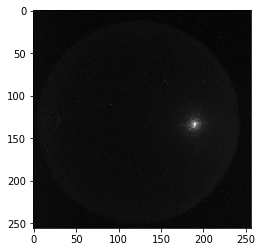

In [52]:

res = cv2.resize(np.log(image),None,fx=0.25,fy=0.25,interpolation=cv2.INTER_CUBIC)
plt.imshow(res, cmap='gray')